In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [12]:
gpt5   = [2,2,0,1,0,1,2,1,2,1,1,1,1,1,2,2,0,2,1,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1,2,1,0,0,0,0,1,2,0,0,0,1,0,0,1,1,0,0,0,1,1,1,1,2,0,0,0,0,2,0,0,2,0,0,0,2,1,1,2,1,0,1,1]
claude = [2,1,1,1,0,1,2,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,1,2,1,0,1,0,0,1,1,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,2,0,0,2,1,1,0,1,1,1,1,1,1]
gemini = [2, 2, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0]  # จาก Gemini
grok =   [2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0]
deepseek  = [2, 1, 0, 1, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0]



# รวมใน DataFrame
df = pd.DataFrame({
    "GPT5": gpt5,
    "Claude": claude,
    "Gemini": gemini,
    "Grok": grok,
    "deepseek": deepseek
})
df
final_labels = []
for i in range(len(df)):
    vote = Counter(df.iloc[i]).most_common(1)[0][0]
    final_labels.append(vote)

df["Final"] = final_labels
print("Final labels:", final_labels)

Final labels: [2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0]


In [15]:
df

,GPT5,Claude,Gemini,Grok,deepseek,Final
0,2,2,2,2,2,2
1,2,1,2,1,1,1
2,0,1,0,0,0,0
3,1,1,1,1,1,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
72,2,1,2,1,1,1
73,1,1,1,0,0,1
74,0,1,2,0,1,0
75,1,1,1,0,0,1


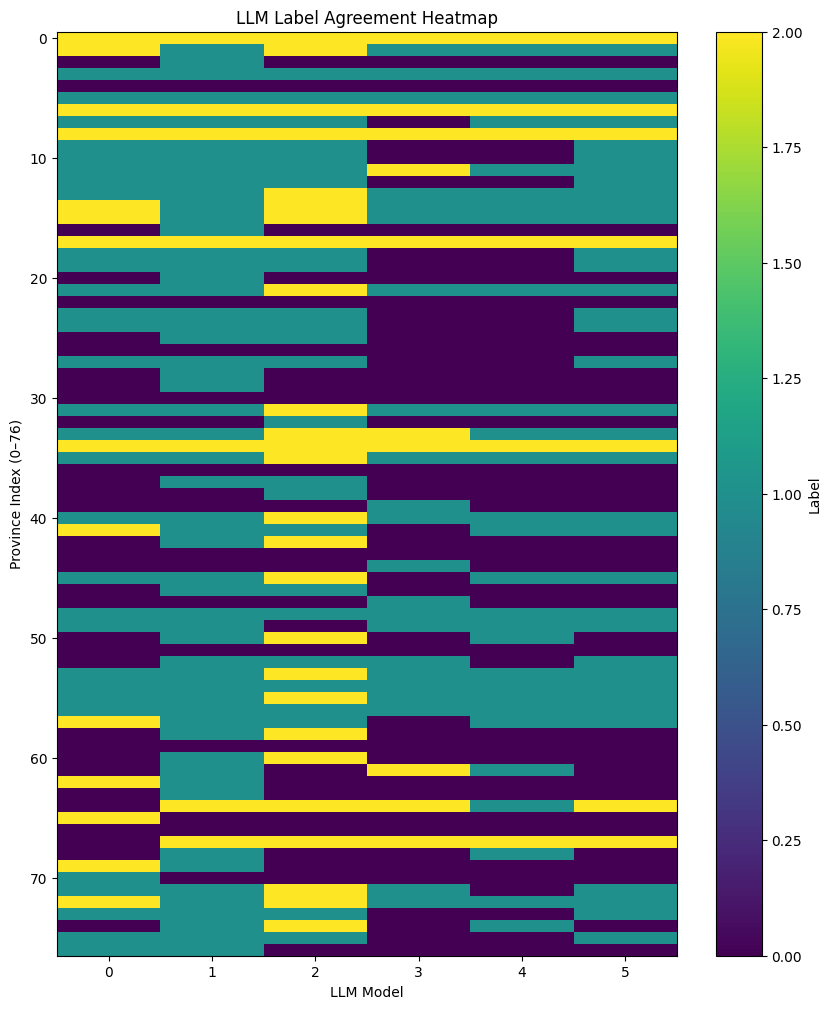

In [13]:
plt.figure(figsize=(10, 12))
plt.imshow(df, cmap="viridis", aspect="auto")
plt.title("LLM Label Agreement Heatmap")
plt.xlabel("LLM Model")
plt.ylabel("Province Index (0–76)")
plt.colorbar(label="Label")
plt.show()


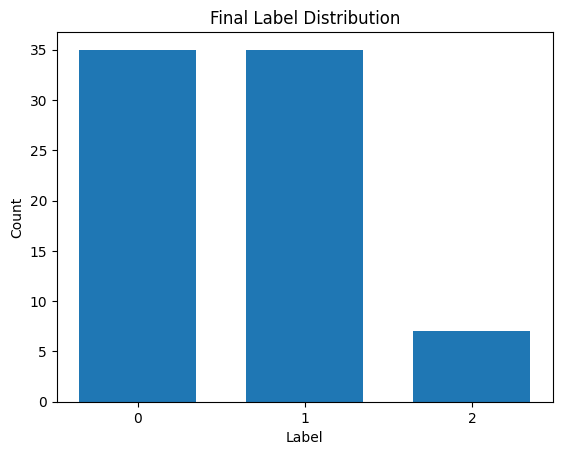

In [14]:
plt.hist(df["Final"], bins=[-0.5,0.5,1.5,2.5], rwidth=0.7)
plt.xticks([0,1,2])
plt.title("Final Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()
